# Goodreads Data set Analysis

![](https://i.imgur.com/5wjKn8A.jpg)

In [80]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading Data

In [81]:
df = pd.read_csv("books.csv")

## Exploring Data

In [82]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [56]:
#finding the number of rows and columns in the dataset
df.shape 

(11127, 13)

In [83]:
# checking the name and number of columns
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [84]:
#getting a general info on data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         3 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


# Cleaning Data

In [85]:
#Percentage of missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Unnamed: 12           0.99973
bookID                0.00000
title                 0.00000
authors               0.00000
average_rating        0.00000
isbn                  0.00000
isbn13                0.00000
language_code         0.00000
  num_pages           0.00000
ratings_count         0.00000
text_reviews_count    0.00000
publication_date      0.00000
publisher             0.00000
dtype: float64

In [86]:
 # dropping unnecessary columns
df.drop(['bookID','isbn','isbn13', "Unnamed: 12"],axis = 1,inplace=True)
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [87]:
# number of books in every language
df.language_code.value_counts()

eng            8908
en-US          1408
spa             218
en-GB           214
fre             144
ger              99
jpn              46
mul              19
zho              14
grc              11
por              10
en-CA             7
ita               5
lat               3
enm               3
rus               2
swe               2
9.78156E+12       1
nor               1
9.78067E+12       1
msa               1
wel               1
tur               1
ara               1
gla               1
glg               1
nl                1
srp               1
ale               1
9.78159E+12       1
9.78085E+12       1
Name: language_code, dtype: int64



As we see that majority of the books are in English. So lets only concentrate on English books.


In [88]:
# selecting only english books
df = df[(df.language_code =='eng')|(df.language_code =='eng-US')|(df.language_code =='eng-GB')] # selecting only English books
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [89]:
#changing ratings type to float
df.average_rating = df.average_rating.astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 11125
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               8908 non-null   object 
 1   authors             8908 non-null   object 
 2   average_rating      8908 non-null   float64
 3   language_code       8908 non-null   object 
 4     num_pages         8908 non-null   object 
 5   ratings_count       8908 non-null   int64  
 6   text_reviews_count  8908 non-null   int64  
 7   publication_date    8908 non-null   object 
 8   publisher           8908 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 695.9+ KB


## Analyzing Data

#### Top 10 most rated books

In [91]:
most_rated = df.groupby('title')['ratings_count'].sum().sort_values(ascending=False)
highest_rated = most_rated[:10]

In [92]:
highest_rated

title
Twilight (Twilight  #1)                                         4597666
The Hobbit  or There and Back Again                             2530894
The Catcher in the Rye                                          2457092
Angels & Demons (Robert Langdon  #1)                            2424474
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)     2342726
Harry Potter and the Chamber of Secrets (Harry Potter  #2)      2300296
Harry Potter and the Order of the Phoenix (Harry Potter  #5)    2153167
The Fellowship of the Ring (The Lord of the Rings  #1)          2130267
Animal Farm                                                     2111750
Harry Potter and the Half-Blood Prince (Harry Potter  #6)       2096903
Name: ratings_count, dtype: int64

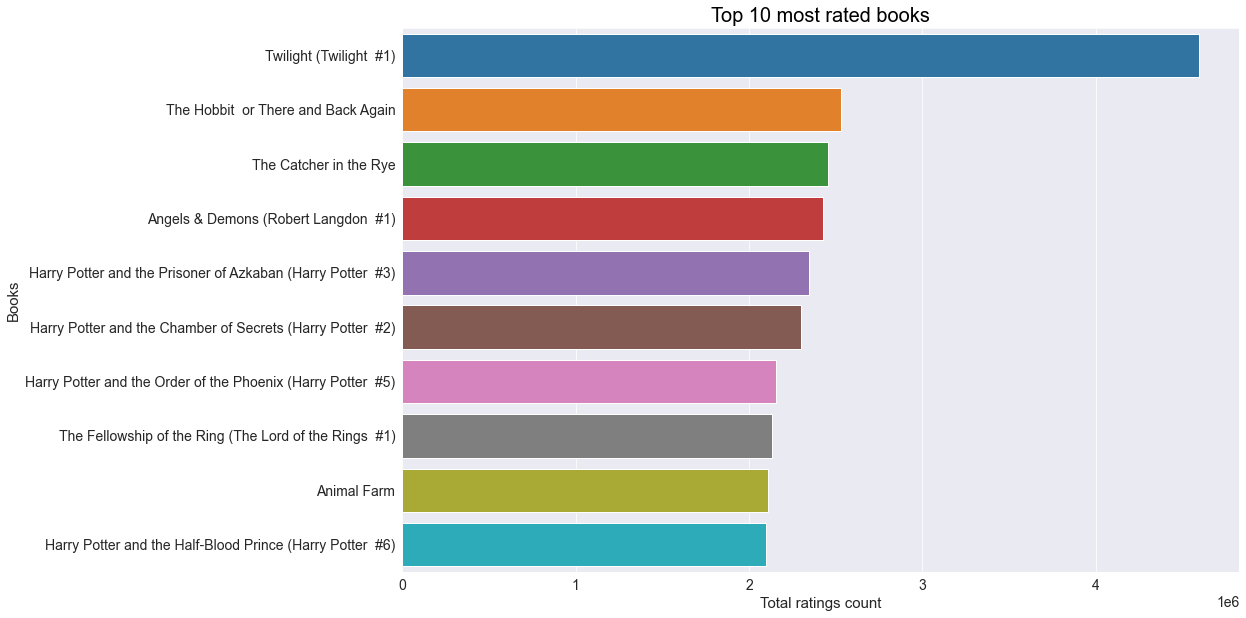

In [93]:
plt.figure(figsize=(15,10))
sns.barplot(highest_rated, highest_rated.index)
plt.xlabel("Total ratings count", fontsize=15)
plt.ylabel("Books", fontsize=15)
plt.title("Top 10 most rated books",fontsize=20,color='black');

#### Top 10 books with most text reviews


In [94]:
most_rated_text = df.groupby('title')['text_reviews_count'].sum().sort_values(ascending=False)
highest_rated_text = most_rated_text[:10]

In [95]:
highest_rated_text

title
Twilight (Twilight  #1)                                      94265
The Book Thief                                               86881
The Giver (The Giver  #1)                                    56604
The Alchemist                                                55919
Water for Elephants                                          52759
The Lightning Thief (Percy Jackson and the Olympians  #1)    47951
Eat  Pray  Love                                              47620
The Glass Castle                                             46182
The Catcher in the Rye                                       43499
The Curious Incident of the Dog in the Night-Time            37262
Name: text_reviews_count, dtype: int64

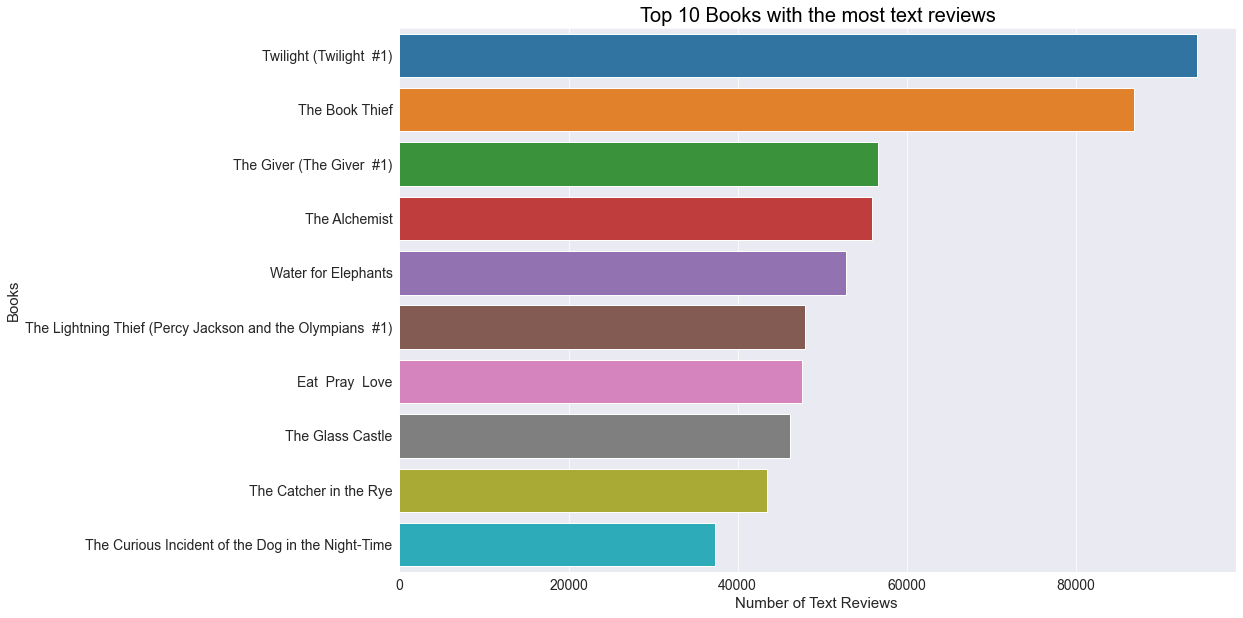

In [96]:
plt.figure(figsize=(15,10))
sns.barplot(highest_rated_text, highest_rated_text.index)
plt.xlabel("Number of Text Reviews ", fontsize=15)
plt.ylabel("Books", fontsize=15)
plt.title("Top 10 Books with the most text reviews",fontsize=20,color='black');

#### Author of most books


In [97]:
author_of_most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
author_of_most_books

,title
authors,
P.G. Wodehouse,37
Stephen King,34
Agatha Christie,32
Sandra Brown,27
Dick Francis,26
Orson Scott Card,26
James Patterson,23
Gordon Korman,22
Margaret Weis/Tracy Hickman,21


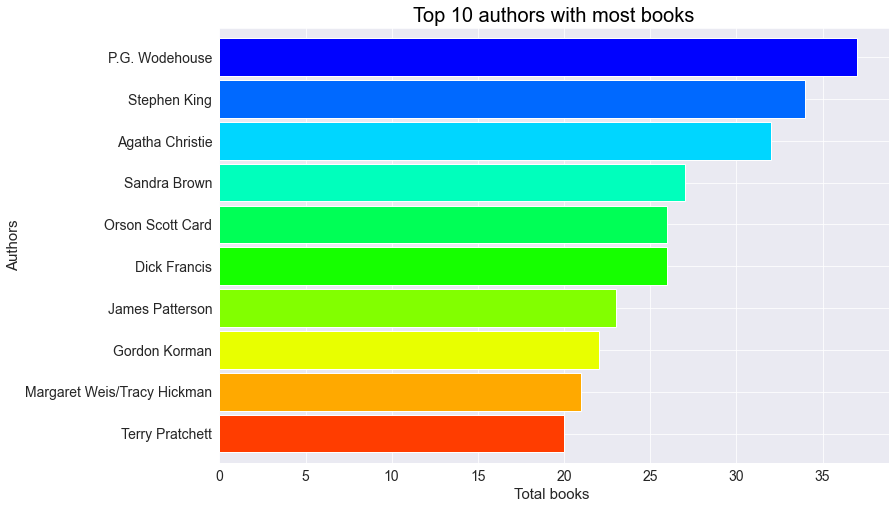

In [98]:
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books",fontsize=20,color='black');

#### Average rating distribution of all books


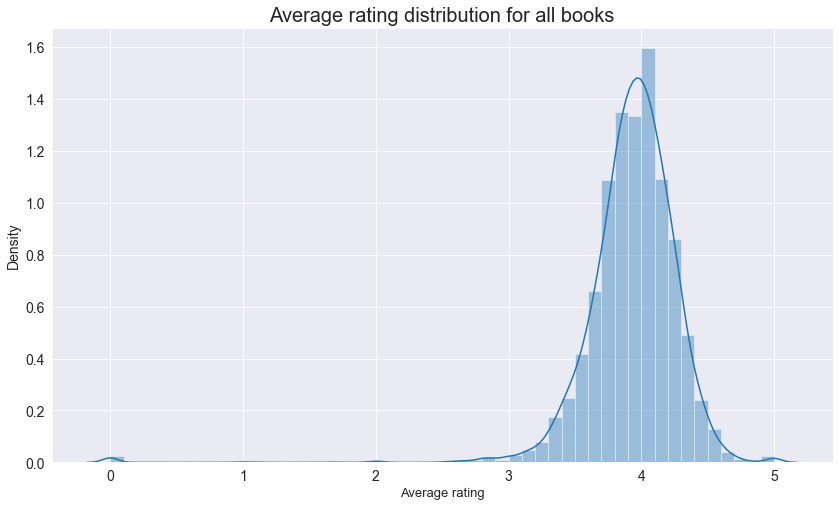

In [100]:
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13);

#### Top 10 book Publishers

In [118]:
data=df.publisher.value_counts().head(10)
data

Vintage             295
Penguin Books       232
Penguin Classics    159
Ballantine Books    126
Mariner Books       121
Bantam              100
Harper Perennial     92
Pocket Books         90
HarperCollins        90
Berkley              79
Name: publisher, dtype: int64

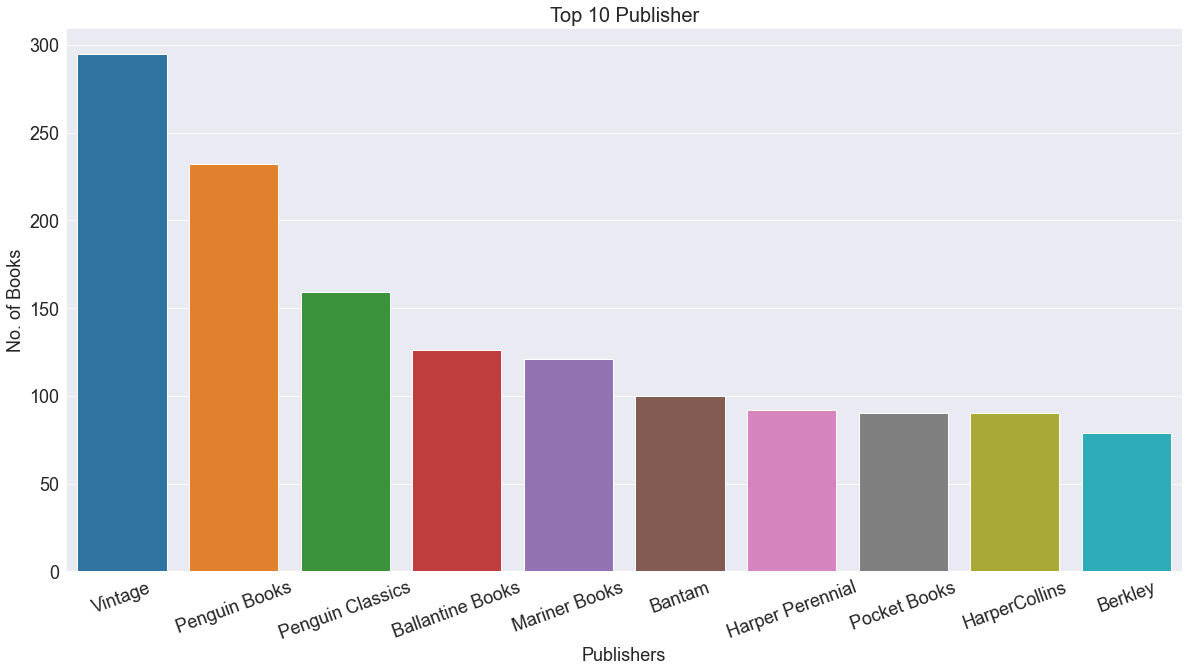

In [119]:
plt.figure(figsize=(20,10))

 
ax= sns.barplot(x=data.index,y=data.values)
plt.title("Top 10 Publisher",fontsize=20)
plt.xlabel("Publishers",fontsize=18)
plt.ylabel("No. of Books",fontsize=18)

plt.xticks(fontsize=18,rotation=20)
plt.yticks(fontsize=18)
plt.show()